TUGAS STATISTIKA TERAPAN 

Nama Kelompok :

1. Farhani Ilham Hidayatullah (G1A021081)
2. Kahfi Zairan Maulana (G1A021041)

In [1]:
#Import Library Yang Digunakan
import pandas as pd
import pandas as pan
import numpy as num
import statistics
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Load Dataset Menggunakan URL
dataset = pan.read_csv("https://raw.githubusercontent.com/FarhaniIlhamH081/Tugas-Statistika-Terapan/main/number-of-internet-users-by-country2.csv")

In [3]:
#URL Dataset
url = "https://raw.githubusercontent.com/FarhaniIlhamH081/Tugas-Statistika-Terapan/main/number-of-internet-users-by-country2.csv"
Internet_csv = pd.read_csv(url)

In [4]:
#Menampilkan 5 Record Dari Dataset Yang Telah Di Upload, Menggunakan Head()
dataset.head()

,Entity,Code,Year,Number of internet users (OWID based on WB & UN)
0,Afghanistan,AFG,1990,NaN
1,Afghanistan,AFG,2001,990.0
2,Afghanistan,AFG,2002,1003.0
3,Afghanistan,AFG,2003,20272.0
4,Afghanistan,AFG,2004,25520.0


In [5]:
#Menampilkan Jumlah Baris Dan Kolom Pada Dataset
dataset.shape

(310, 4)

In [6]:
#Menampilkan Info Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Entity                                            310 non-null    object 
 1   Code                                              310 non-null    object 
 2   Year                                              310 non-null    int64  
 3   Number of internet users (OWID based on WB & UN)  298 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.8+ KB


In [7]:
#Menampilkan Data Statistik Dari Dataset
dataset.describe()

,Year,Number of internet users (OWID based on WB & UN)
count,310.000000,2.980000e+02
mean,2004.487097,2.834241e+06
std,7.616506,5.559255e+06
min,1970.000000,1.020000e+02
25%,1999.000000,3.000125e+04
50%,2005.000000,2.825670e+05
75%,2011.000000,2.693423e+06
max,2017.000000,3.111807e+07


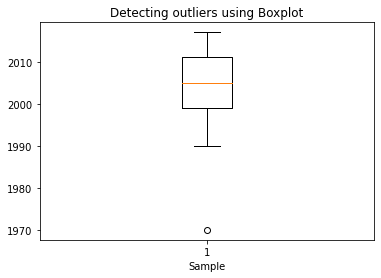

In [8]:
#Menampilkan Outliers Dataset Pada Baris Writing Score Menggunakan Boxplot
sample= dataset["Year"] 

plt.boxplot(sample, vert=True)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

In [10]:
#Mencari nilai outliers menggunakan metode Z-scores
outliers = []
def detect_outliers_zscore(data):
    thres = 2
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [1970]


In [11]:
#Mencari Outliers Pada Dataset Menggunakan IQR
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [1970]


In [12]:
#Menghilangkan Outliers Pada Dataset Menggunakan Trimming
for i in sample_outliers:
    a = np.delete("Year", np.where("Year"==i))
print(a)
print(len(sample), len(a))

['Year']
310 1


In [13]:
#Menentukan flooring and capping pada dataset
#Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

1995.0 2014.0
New array: [1995. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2014. 2014. 1995. 1995. 1996. 1997. 1998. 1999. 2000.
 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012.
 2013. 2014. 2014. 2014. 1995. 1995. 1995. 1996. 1997. 1998. 1999. 2000.
 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012.
 2013. 2014. 2014. 2014. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002.
 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.
 2014. 2014. 1995. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2014.
 2014. 1995. 1995. 1995. 1995. 1995. 1996. 1997. 1998. 1999. 2000. 2001.
 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014. 2014. 2014. 1995. 1995. 1995. 1996. 1997. 1998. 1999. 2000. 2001.
 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014. 2014. 2014. 1995. 1

In [14]:
# Replace With Median
median = np.median(sample)
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  0      1990
1      2001
2      2002
3      2003
4      2004
       ... 
305    1999
306    2000
307    2001
308    2002
309    2003
Name: Year, Length: 310, dtype: int64
New array:  [1990 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 1990   14 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1990 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 1990 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 1990 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1990 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 1990 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 19

Text(0.5, 0, 'Sample')

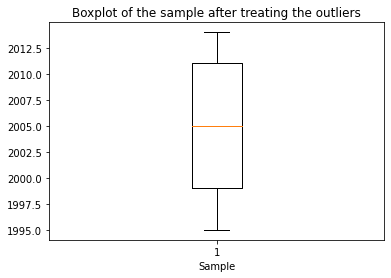

In [16]:
#Menampilkan Boxplot Yang Telah Bebas Dari Outliers 
plt.boxplot(b, vert=True)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

Correlation Analysis (Bivariate)

In [17]:
#Menampilkan korelasi antar kolom numerik
dataset.corr()

,Year,Number of internet users (OWID based on WB & UN)
Year,1.00000,0.41242
Number of internet users (OWID based on WB & UN),0.41242,1.00000


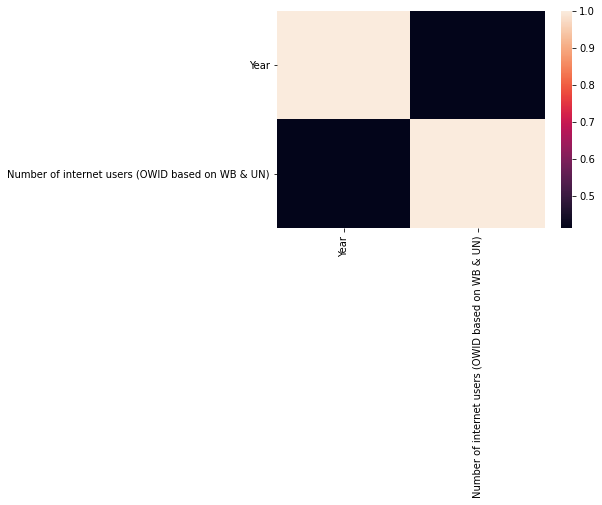

In [18]:
#Menampilkan Korelasi Dataset Menggunakan Heatmap
sns.heatmap(dataset.corr())
plt.show()